# Vacabulary Size 바꿔보기  

## 할 일
- Vocabulary Size 바꿔보기
    -  나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅 중 세 개 이상을 사용할 것  
    - Vocabulary Size를 5000, 모든 단어, 임의의 직접 설정값을 사용  

- Deep learning 모델과 비교
    - RNN, 1-D CNN 등과 비교
    - Pretrained model, Word2vec 등은 사용하지 말 것


## 지금까지 한 것 돌아보기
1. Tokenize, 정수화 된 데이터를 텍스트로 복원하는 등, keras.datasets.reuters 모듈의 기본적인 사용법
2. 벡터화 : tfidf까지
3. 각종 모델 적용
4. 평가 지표 : f1 score 확인

# 노드의 코드 가져오기

In [244]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [245]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [246]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [247]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [248]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [249]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [250]:
' '.join(index_to_word[i] for i in [4, 587, 23, 133, 6, 30, 515])

'the transaction is expected to be completed'

In [251]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [252]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [253]:
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [254]:
x_test[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3'

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [256]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [257]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [258]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [259]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [260]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


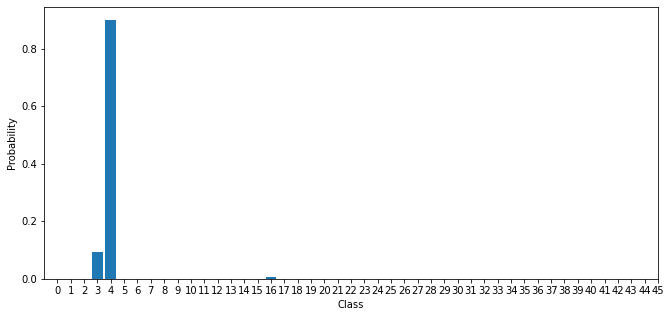

In [19]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [20]:
model.predict(tfidfv_test[3])

array([4])

In [261]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [23]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

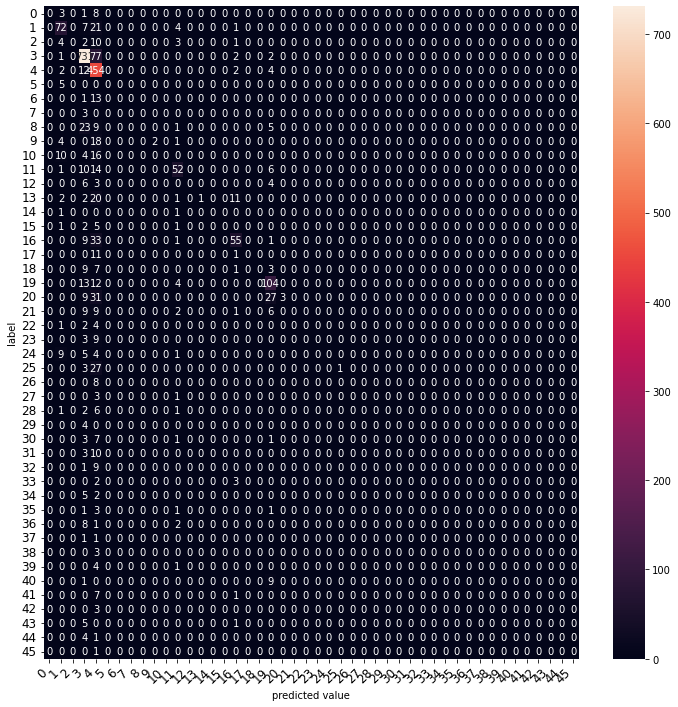

In [24]:
graph_confusion_matrix(model, tfidfv_test, y_test)

In [25]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [26]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [27]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


# 프로젝트에서 해야 할 작업  
## Vocabulary Size 바꿔보기  
- reuters.load_data에서 tfidf를 다시 구현합니다.
- 각 분류 모델을 fit, predict하여 결과를 비교합니다.

## 딥 러닝 모델과의 비교
- 모델을 빌드하고, Tokenize된 데이터를 이용해 train, predict 합니다. [imdb 감정 분석에서 썼던 노트북](https://github.com/chhyyi/aiffel/blob/main/LMS/EXP8_imdb_emotion_analysis.ipynb)을 참고하겠습니다.

# 1. tfidf matrix 새로 하기

In [265]:
#import libraries
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [264]:
def get_tfidf(num_words, split):
    """
    This function return tfidf array of train, test dataset of keras.datasets.reuters module.
    """
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=split)

    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
      index_to_word[index]=token
    decoded = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        decoded.append(t)

    x_train = decoded
    decoded = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        decoded.append(t)

    x_test = decoded
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

    x_test_dtm = dtmvector.transform(x_test)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm)
    return tfidfv, tfidfv_test


# 2. 각 모델 적용하기
## 2.1. 전체 단어

### vote
help(reuters.load_data)에서 확인한 결과, reuters.load_data는 Num_words가 None이면 모든 단어를 사용합니다.

In [16]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

tfidfv, tfidfv_test=get_tfidf(None, 0.2)

In [32]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [34]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Voting 정확도: 0.8156723063223509


### Naive Bayes 모델

In [35]:
model = MultinomialNB()
model.fit(tfidfv, y_train)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Naive Bayes 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Naive Bayes 정확도: 0.5997328584149599


### Decision Tree

In [36]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Decision Tree 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Decision Tree 정확도: 0.6211041852181657


### Random Forest

In [37]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Random Forest 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

Random Forest 정확도: 0.6544968833481746


### Gradient Boosting Tree

In [38]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("Gradient Boosting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#정확도: 0.7702582368655387

      Iter       Train Loss   Remaining Time 
         1           1.4301           15.03m
         2       76760.8864           15.06m
         3   766490025.2967           14.87m
         4 660857139232122368.0000           14.75m
         5 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.61m
         6 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.47m
         7 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.46m
         8 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584394912965173495998495951159296.0000           14.37m
         9 1006529060407114004275646732312951615311370376755613476759245377256674837692003341988813591601665584

In [267]:
rest_models(None, 0.2)

로지스틱 회귀 정확도: 0.8165627782724845
LinearSVC정확도: 0.7934105075690115
정확도: 0.7649154051647373


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.2. 5000 words


In [14]:
def models_test(num_words, test_split):
    """just merged above code cells"""
    tfidfv, tfidfv_test=get_tfidf(num_words, test_split)
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    voting_classifier = VotingClassifier(estimators=[
             ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
            ('cb', ComplementNB()),
            ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft')
    voting_classifier.fit(tfidfv, y_train)

    predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Voting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

    model = MultinomialNB()
    model.fit(tfidfv, y_train)
    predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Naive Bayes 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Decision Tree 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Random Forest 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    grbt = GradientBoostingClassifier(random_state=0) # verbose=3
    grbt.fit(tfidfv, y_train)
    predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("Gradient Boosting 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [39]:

    
models_test(5000, 0.2)

Voting 정확도: 0.8103294746215495
Naive Bayes 정확도: 0.6731967943009796
Decision Tree 정확도: 0.6179875333926982
Random Forest 정확도: 0.701246660730187
Gradient Boosting 정확도: 0.767586821015138


In [262]:
def rest_models(num_words, test_split):
    '''CNB, Logistic Regression, SVM'''
    tfidfv, tfidfv_test=get_tfidf(num_words, test_split)
    word_index = reuters.get_word_index(path="reuters_word_index.json")

    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(tfidfv, y_train)
    predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
    lsvc.fit(tfidfv, y_train)
    predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("LinearSVC정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [20]:
rest_models(5000, 0.2)

로지스틱 회귀 정확도: 0.8036509349955476
LinearSVC정확도: 0.7751558325912734
정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.3. 15000 words

In [21]:
models_test(15000, 0.2)

Voting 정확도: 0.8143365983971504
Naive Bayes 정확도: 0.6331255565449688
Decision Tree 정확도: 0.6193232413178985
Random Forest 정확도: 0.6714158504007124
Gradient Boosting 정확도: 0.7707034728406055


In [22]:
rest_models(15000, 0.2)

로지스틱 회귀 정확도: 0.8147818343722173
LinearSVC정확도: 0.784060552092609
정확도: 0.7720391807658059


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.4. 12500 Words

In [46]:
models_test(12500, 0.2)
rest_models(12500, 0.2)

Voting 정확도: 0.8192341941228851
Naive Bayes 정확도: 0.6455921638468388
Decision Tree 정확도: 0.6206589492430988
Random Forest 정확도: 0.6812110418521816
Gradient Boosting 정확도: 0.7747105966162066
로지스틱 회귀 정확도: 0.8107747105966162
LinearSVC정확도: 0.7907390917186109
정확도: 0.7733748886910062


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.5. 7500 Words

In [47]:
models_test(7500, 0.2)
rest_models(7500, 0.2)

Voting 정확도: 0.8130008904719501
Naive Bayes 정확도: 0.6642920747996438
Decision Tree 정확도: 0.6202137132680321
Random Forest 정확도: 0.6878895814781835
Gradient Boosting 정확도: 0.7693677649154052
로지스틱 회귀 정확도: 0.8040961709706145
LinearSVC정확도: 0.7871772039180766
정확도: 0.7693677649154052


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.6. 10000 Words
위에서 LinearSVC, Linear Regression 적용을 안해서 다시 합니다.

In [266]:
rest_models(10000, 0.2)

로지스틱 회귀 정확도: 0.8107747105966162
LinearSVC정확도: 0.784060552092609
정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 3. 딥러닝 분류 모델과의 비교
위에도 썼지만 [fundamental exp8 노트북](https://github.com/chhyyi/aiffel/blob/main/LMS/EXP8_imdb_emotion_analysis.ipynb)을 많이 복사하였습니다

## vocab_size는 어떻게 되나? :
우리가 get_word_index를 받아올 때, 이것은 고정된 dictionary 파일이고 실제 30979의 길이를 가지고 있습니다. 하지만 어떨까요?  
```python
a_flatten2=[j for i in a for j in i]
print(len(a_flatten2), len(set(a_flatten2)), max(a_flatten2))
```  
num_words=10000 인 경우 출력 결과 : 1307239 9982 9999  

여기에서 보면, 일단 일단 0~9999까지의 숫자로 정수화된 data를 가져오고, 그 중에서 몇 개를 지우는 것으로 보입니다. 그렇다면 vocab_size는 이 경우 9982이어도 괜찮을까요? 모르니까 일단 9982를 해보고 돌아가면 그걸 쓰고 아니면 더하겠습니다. 예전에 vocabulary size보다 적은 수를 넣으니까 칼같이 에러가 떴던 기억이 있으니 괜찮겠죠.

## 길이 확인과 padding
길이를 확인해보고 패딩을 합시다

In [52]:

lengths = [len(i) for i in x_train]
print(max(lengths), min(lengths), np.std(lengths), np.mean(lengths))
maxlen=437

2376 13 145.81413013409278 145.5398574927633


In [53]:
print(sum([i<437 for i in lengths])/len(x_train)) #길이가 437보다 작은 데이터의 비율 확인 (x_train내에서)

0.9441104431084391


In [54]:
print(0 in word_index.values(), 0 in [i for j in x_train for i in j])
#check if 

False False


최대길이가 너무 커서 잘라야 할 거 같습니다. 
또 0이 없으니까 0으로 pad를 채우면 되겠습니다.

In [173]:
X_train=tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, padding='pre', value=0)

In [174]:
X_test=tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen, padding='pre', value=0)

In [175]:
print(len(X_train),len(x_train),len(X_test),len(x_test),len(y_train), len(y_test))

8982 8982 2246 2246 8982 2246


In [176]:
print(len(set(y_test)), max(y_test), min(y_test))

46 45 0


In [177]:
Y_train=tf.one_hot(y_train, depth=46)
Y_test=tf.one_hot(y_test, depth=46)

In [215]:
import tensorflow as tf

vocab_size = 9983
word_vector_dim = 64  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
#model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(92, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_53 (Embedding)     (None, None, 64)          638912    
_________________________________________________________________
lstm_64 (LSTM)               (None, 256)               328704    
_________________________________________________________________
dense_109 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_110 (Dense)            (None, 92)                11868     
_________________________________________________________________
dense_111 (Dense)            (None, 46)                4278      
Total params: 1,016,658
Trainable params: 1,016,658
Non-trainable params: 0
_________________________________________________________________


In [216]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

epochs=51

history = model.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    validation_data=(X_test, Y_test), verbose=1)
                    #batch_size=256

Epoch 1/51
281/281 [==============================] - 8s 26ms/step - loss: 2.3151 - accuracy: 0.3853 - val_loss: 1.8718 - val_accuracy: 0.4831
Epoch 2/51
281/281 [==============================] - 7s 24ms/step - loss: 1.8064 - accuracy: 0.5101 - val_loss: 1.7244 - val_accuracy: 0.5721
Epoch 3/51
281/281 [==============================] - 7s 24ms/step - loss: 1.7373 - accuracy: 0.5428 - val_loss: 2.1759 - val_accuracy: 0.5245
Epoch 4/51
281/281 [==============================] - 7s 25ms/step - loss: 1.6647 - accuracy: 0.5727 - val_loss: 1.6754 - val_accuracy: 0.5695
Epoch 5/51
281/281 [==============================] - 7s 25ms/step - loss: 1.5387 - accuracy: 0.6037 - val_loss: 2.3008 - val_accuracy: 0.3931
Epoch 6/51
281/281 [==============================] - 7s 25ms/step - loss: 1.6536 - accuracy: 0.5666 - val_loss: 1.6939 - val_accuracy: 0.5677
Epoch 7/51
281/281 [==============================] - 7s 24ms/step - loss: 1.4795 - accuracy: 0.6168 - val_loss: 1.7351 - val_accuracy: 0.5806

In [217]:
vocab_size = 9983
word_vector_dim = 128  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
#model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(92, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, None, 128)         1277824   
_________________________________________________________________
lstm_65 (LSTM)               (None, 256)               394240    
_________________________________________________________________
dense_112 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_113 (Dense)            (None, 92)                11868     
_________________________________________________________________
dense_114 (Dense)            (None, 46)                4278      
Total params: 1,721,106
Trainable params: 1,721,106
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

epochs=51

history = model.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    validation_data=(X_test, Y_test), verbose=1)
                    #batch_size=256

Epoch 1/51
281/281 [==============================] - 9s 28ms/step - loss: 2.2621 - accuracy: 0.4149 - val_loss: 1.8519 - val_accuracy: 0.4920
Epoch 2/51
281/281 [==============================] - 8s 27ms/step - loss: 1.7908 - accuracy: 0.5267 - val_loss: 1.7946 - val_accuracy: 0.5521
Epoch 3/51
281/281 [==============================] - 8s 27ms/step - loss: 1.7704 - accuracy: 0.5233 - val_loss: 1.8188 - val_accuracy: 0.5312
Epoch 4/51
281/281 [==============================] - 8s 27ms/step - loss: 1.6729 - accuracy: 0.5672 - val_loss: 1.7100 - val_accuracy: 0.5597
Epoch 5/51
281/281 [==============================] - 8s 27ms/step - loss: 1.5795 - accuracy: 0.5912 - val_loss: 1.6429 - val_accuracy: 0.5917
Epoch 6/51
281/281 [==============================] - 8s 27ms/step - loss: 1.4545 - accuracy: 0.6307 - val_loss: 1.5439 - val_accuracy: 0.6278
Epoch 7/51
281/281 [==============================] - 8s 27ms/step - loss: 1.2728 - accuracy: 0.6746 - val_loss: 1.5871 - val_accuracy: 0.6064

KeyboardInterrupt: 

In [220]:
prediction=model.predict(X_test)
import tensorflow_addons as tfa
metric=tfa.metrics.F1Score(num_classes=46, threshold=0.5)
metric.update_state(Y_test, prediction)
result = metric.result()
print(result)

tf.Tensor(
[0.09090909 0.35999998 0.3        0.58746356 0.41478813 0.
 0.61538464 0.10526316 0.13304721 0.19736843 0.6666666  0.09976617
 0.02586207 0.17730497 0.06779661 0.         0.11651728 0.05678234
 0.31168833 0.13094573 0.09756097 0.22702703 0.         0.14285715
 0.08333334 0.3898305  0.15384616 0.07142857 0.32000002 0.
 0.21276595 0.30769232 0.09375    0.57142854 0.14925374 0.13333333
 0.11347518 0.         0.13333334 0.         0.15       0.
 0.28571427 0.57142854 0.8000001  0.6666667 ], shape=(46,), dtype=float32)


In [225]:
vocab_size = 9983
word_vector_dim = 256  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
#model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(512))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, None, 256)         2555648   
_________________________________________________________________
lstm_68 (LSTM)               (None, 512)               1574912   
_________________________________________________________________
dense_121 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_122 (Dense)            (None, 46)                23598     
Total params: 4,416,814
Trainable params: 4,416,814
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

epochs=20

history = model.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    validation_data=(X_test, Y_test), verbose=1)
                    #batch_size=256

Epoch 1/20
281/281 [==============================] - 22s 75ms/step - loss: 2.3216 - accuracy: 0.3912 - val_loss: 2.0339 - val_accuracy: 0.4978
Epoch 2/20
281/281 [==============================] - 21s 73ms/step - loss: 1.8376 - accuracy: 0.5177 - val_loss: 1.6968 - val_accuracy: 0.5717
Epoch 3/20
281/281 [==============================] - 20s 72ms/step - loss: 1.6268 - accuracy: 0.5785 - val_loss: 1.7024 - val_accuracy: 0.5668
Epoch 4/20
281/281 [==============================] - 20s 72ms/step - loss: 1.5427 - accuracy: 0.6058 - val_loss: 1.5612 - val_accuracy: 0.6327
Epoch 5/20
281/281 [==============================] - 21s 73ms/step - loss: 1.3452 - accuracy: 0.6651 - val_loss: 1.4041 - val_accuracy: 0.6434
Epoch 6/20
281/281 [==============================] - 21s 73ms/step - loss: 1.1557 - accuracy: 0.7036 - val_loss: 1.3100 - val_accuracy: 0.6674
Epoch 7/20
281/281 [==============================] - 20s 73ms/step - loss: 0.9785 - accuracy: 0.7450 - val_loss: 1.2914 - val_accuracy:

In [227]:
prediction=model.predict(X_test)
metric.update_state(Y_test, prediction)
result = metric.result()
print(result)

tf.Tensor(
[0.11290322 0.24329627 0.2681564  0.5805291  0.40511352 0.11111111
 0.3877551  0.03488372 0.12139303 0.30769232 0.34482762 0.12202381
 0.03993345 0.12162162 0.03428572 0.         0.12183436 0.04222222
 0.34666663 0.13130194 0.10493553 0.24528301 0.         0.0487013
 0.16666667 0.45360827 0.25       0.04255319 0.17142858 0.03773585
 0.2162162  0.18823531 0.16666667 0.17977527 0.14953272 0.02807018
 0.15261045 0.03636364 0.22222224 0.01526718 0.11494253 0.03733334
 0.03846154 0.3        0.72727275 0.09302326], shape=(46,), dtype=float32)


In [342]:
#plotgraphs
w12500={'Voting':0.8192341941228851,
'NaiveBayes':0.6455921638468388,
'DecisionTree':0.6206589492430988,
'RandomForest':0.6812110418521816,
'GradientBoosting':0.7747105966162066,
'LR':0.8107747105966162,
'LinearSVC':0.7907390917186109,
'CNB':0.7733748886910062}

w7500={'Voting':0.8130008904719501,
'NaiveBayes':0.6642920747996438,
'DecisionTree':0.6202137132680321,
'RandomForest':0.6878895814781835,
'GradientBoosting':0.7693677649154052,
'LR':0.8040961709706145,
'LinearSVC':0.7871772039180766,
'CNB':0.7693677649154052}

w15000={'Voting':0.8143365983971504,
'NaiveBayes':0.6331255565449688,
'DecisionTree':0.6193232413178985,
'RandomForest':0.6714158504007124,
'GradientBoosting':0.7707034728406055,
'LR':0.8147818343722173,
'LinearSVC':0.784060552092609,
'CNB':0.7720391807658059}

w5000={'Voting':0.8103294746215495,
'NaiveBayes':0.6731967943009796,
'DecisionTree':0.6179875333926982,
'RandomForest':0.701246660730187,
'GradientBoosting':0.767586821015138,
'LR':0.8036509349955476,
'LinearSVC':0.7751558325912734,
'CNB':0.7707034728406055}


w10000={'Voting':0.8165627782724845,
'NaiveBayes':0.6567230632235085,
'DecisionTree':0.6211041852181657,
'RandomForest':0.6544968833481746,
'GradientBoosting':0.7702582368655387,
'CNB':0.7707034728406055,
'LR':0.8107747105966162,
'LinearSVC':0.784060552092609}

wMax={'Voting':0.8156723063223509,
'NaiveBayes':0.5997328584149599,
'DecisionTree':0.6211041852181657,
'RandomForest':0.6544968833481746,
'GradientBossting':0.7702582368655387,
'LR':0.8165627782724845,
'LinearSVC':0.7934105075690115,
'CNB':0.7649154051647373}

# 결과 분석

In [343]:
keys=[]
values=[]
for key,value in w12500.items():
    keys.append(key)
    values.append(value)
    
results=pd.DataFrame({'model':keys,'12500acc':values})
results

,model,12500acc
0,Voting,0.819234
1,NaiveBayes,0.645592
2,DecisionTree,0.620659
3,RandomForest,0.681211
4,GradientBoosting,0.774711
5,LR,0.810775
6,LinearSVC,0.790739
7,CNB,0.773375


In [344]:
keys=[]
values=[]
for key,value in w5000.items():
    keys.append(key)
    values.append(value)
    
results2=pd.DataFrame({'model':keys,'5000acc':values})
results2

,model,5000acc
0,Voting,0.810329
1,NaiveBayes,0.673197
2,DecisionTree,0.617988
3,RandomForest,0.701247
4,GradientBoosting,0.767587
5,LR,0.803651
6,LinearSVC,0.775156
7,CNB,0.770703


In [345]:
results=results.merge(results2, how='inner', on='model')
results

,model,12500acc,5000acc
0,Voting,0.819234,0.810329
1,NaiveBayes,0.645592,0.673197
2,DecisionTree,0.620659,0.617988
3,RandomForest,0.681211,0.701247
4,GradientBoosting,0.774711,0.767587
5,LR,0.810775,0.803651
6,LinearSVC,0.790739,0.775156
7,CNB,0.773375,0.770703


In [346]:
keys=[]
values=[]
for key,value in w7500.items():
    keys.append(key)
    values.append(value)
    
results2=pd.DataFrame({'model':keys,'7500acc':values})
results=results.merge(results2, how='inner', on='model')
results

,model,12500acc,5000acc,7500acc
0,Voting,0.819234,0.810329,0.813001
1,NaiveBayes,0.645592,0.673197,0.664292
2,DecisionTree,0.620659,0.617988,0.620214
3,RandomForest,0.681211,0.701247,0.687890
4,GradientBoosting,0.774711,0.767587,0.769368
5,LR,0.810775,0.803651,0.804096
6,LinearSVC,0.790739,0.775156,0.787177
7,CNB,0.773375,0.770703,0.769368


In [347]:
keys=[]
values=[]
for key,value in w10000.items():
    keys.append(key)
    values.append(value)
    
results2=pd.DataFrame({'model':keys,'10000acc':values})
results=results.merge(results2, how='inner', on='model')
results

,model,12500acc,5000acc,7500acc,10000acc
0,Voting,0.819234,0.810329,0.813001,0.816563
1,NaiveBayes,0.645592,0.673197,0.664292,0.656723
2,DecisionTree,0.620659,0.617988,0.620214,0.621104
3,RandomForest,0.681211,0.701247,0.687890,0.654497
4,GradientBoosting,0.774711,0.767587,0.769368,0.770258
5,LR,0.810775,0.803651,0.804096,0.810775
6,LinearSVC,0.790739,0.775156,0.787177,0.784061
7,CNB,0.773375,0.770703,0.769368,0.770703


In [348]:
keys=[]
values=[]
for key,value in w15000.items():
    keys.append(key)
    values.append(value)
    
results2=pd.DataFrame({'model':keys,'15000acc':values})
results=results.merge(results2, how='inner', on='model')
results

,model,12500acc,5000acc,7500acc,10000acc,15000acc
0,Voting,0.819234,0.810329,0.813001,0.816563,0.814337
1,NaiveBayes,0.645592,0.673197,0.664292,0.656723,0.633126
2,DecisionTree,0.620659,0.617988,0.620214,0.621104,0.619323
3,RandomForest,0.681211,0.701247,0.687890,0.654497,0.671416
4,GradientBoosting,0.774711,0.767587,0.769368,0.770258,0.770703
5,LR,0.810775,0.803651,0.804096,0.810775,0.814782
6,LinearSVC,0.790739,0.775156,0.787177,0.784061,0.784061
7,CNB,0.773375,0.770703,0.769368,0.770703,0.772039


In [349]:
results_sorted = results[['model','5000acc','7500acc','10000acc','12500acc','15000acc']]

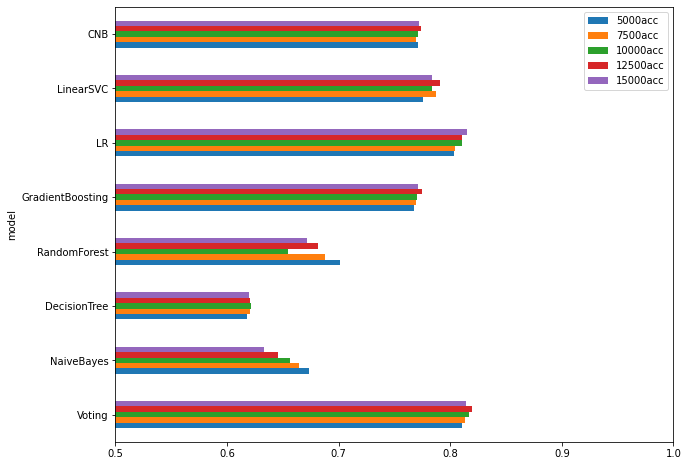

In [359]:
results_sorted.plot.barh(x='model', xlim=(0.5,1.0), figsize=(10,8), title=None)
plt.show()

# 결과,  회고, 돌아보기

위에서 훈련했던 LSTM 넣은 모델이 0.7을 간신히 넘겼으니까 낮은 편입니다. 여기에 들어가면 전체 9개 중 뒤에서 4등이 됩니다.
분류 클래스의 수가 46개나 되고 편중이 심한 데이터셋이므로 f1-score를 보는게 좋겠습니다. 그런데 하나도 맞추지 못해서 0으로 나누게 되는 경우가 너무 많아 f1-score를 보기도 어렵습니다.
Multinomial Naive Bayes 모델, 단어 10000개의 경우를 보면 f1-score들의 평균이 0.10인데 가중치를 고려한 평균은 0.58(weighted average)로 엄청나게 차이가 났습니다.

## num_words에 따른 정확도
(Multinomial) NaiveByes나 RandomForest의 경우 num_words가 적을수록 정확했지만, Linear Regression, Voting, GradientBoosting 등에서는 num_words가 클수록 정확했습니다. 하지만 그 관계성이 뚜렷하게 나타나지는 않고, accuracy에 큰 영향을 끼치지도 않았습니다.


